 ### BANK LENDING DATA PREDICTION NOTEBOOK!

### importing the libraries 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_column",100)
pd.set_option("display.max_rows",100)

### Reading the file

In [5]:
#Reading the file
data = pd.read_csv("XYZCorp_LendingData.csv")

### Data Splitting

*** we'll split data split as per given problem statement condition..

In [6]:
train_df=data[data['issue_d']<'2015-6-01']
test_df=data[data['issue_d']>='2015-6-01']

### Data Pre-processing

#Printing the shape of both splitted dataset to get counts of variables and observations...

In [7]:
print(train_df.shape,test_df.shape)

(849440, 73) (6529, 73)


In [8]:
train_df.isnull().sum().sort_values(ascending=False)

dti_joint                      849000
annual_inc_joint               848998
verification_status_joint      848998
il_util                        837831
mths_since_rcnt_il             836506
open_acc_6m                    836152
open_il_6m                     836152
open_il_24m                    836152
total_bal_il                   836152
open_il_12m                    836152
inq_fi                         836152
open_rv_12m                    836152
open_rv_24m                    836152
max_bal_bc                     836152
all_util                       836152
inq_last_12m                   836152
total_cu_tl                    836152
desc                           734009
mths_since_last_record         719267
mths_since_last_major_derog    636301
mths_since_last_delinq         435980
next_pymnt_d                   246442
tot_cur_bal                     60784
tot_coll_amt                    60784
total_rev_hi_lim                60784
emp_title                       49083
emp_length  

#Printing the concise summary about 'train_df' data frame, and will show the information such as- dtypes,non-null value, memory usage.

In [9]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 849440 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           849440 non-null  int64  
 1   member_id                    849440 non-null  int64  
 2   loan_amnt                    849440 non-null  int64  
 3   funded_amnt                  849440 non-null  int64  
 4   funded_amnt_inv              849440 non-null  float64
 5   term                         849440 non-null  object 
 6   int_rate                     849440 non-null  float64
 7   installment                  849440 non-null  float64
 8   grade                        849440 non-null  object 
 9   sub_grade                    849440 non-null  object 
 10  emp_title                    800357 non-null  object 
 11  emp_length                   806379 non-null  object 
 12  home_ownership               849440 non-null  object 
 13 

#We'll view some basics stastical details such as percentile, standard deviation,mean etc.

In [10]:
print(train_df.describe())

                 id     member_id      loan_amnt    funded_amnt  \
count  8.494400e+05  8.494400e+05  849440.000000  849440.000000   
mean   3.248556e+07  3.502649e+07   14784.688824   14772.703722   
std    2.263390e+07  2.389607e+07    8429.806296    8423.408701   
min    5.670500e+04  7.082500e+04    1000.000000    1000.000000   
25%    9.645494e+06  1.106712e+07    8000.000000    8000.000000   
50%    3.447198e+07  3.712631e+07   13000.000000   13000.000000   
75%    5.457844e+07  5.813932e+07   20000.000000   20000.000000   
max    6.861687e+07  7.351969e+07   35000.000000   35000.000000   

       funded_amnt_inv       int_rate    installment    annual_inc  \
count    849440.000000  849440.000000  849440.000000  8.494400e+05   
mean      14758.375630      13.202480     437.158286  7.512901e+04   
std        8417.928079       4.378088     243.804847  6.427474e+04   
min         400.000000       5.320000      19.870000  0.000000e+00   
25%        8000.000000       9.990000     261.

### Dropping variables

#### Dropping the variables in sense of domain knowledge and generating pandas_profiling report.

In [11]:
train_df=train_df.drop(['inq_last_12m','total_cu_tl','inq_fi','all_util','max_bal_bc','open_rv_24m','open_rv_12m',
                          'il_util','total_bal_il','mths_since_rcnt_il','open_il_24m','open_il_12m','open_il_6m',
                          'open_acc_6m','verification_status_joint','next_pymnt_d','mths_since_last_record',
                          'mths_since_last_major_derog','mths_since_last_delinq',
                          'dti_joint','desc','annual_inc_joint'],axis=1)

#### Checking out the missing values for every variable that present in the dataset.

In [12]:
train_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     49083
emp_length                    43061
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
pymnt_plan                        0
purpose                           0
title                            32
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                   

#Created the manual function for find out the missing values and sorted out as most occured missing data on top and categoriesed the counting form and percentage....

In [13]:
def missing_data(train_df):
    total=train_df.isnull().sum().sort_values(ascending=False)
    percent=(train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
    missing_data=pd.concat([total,percent],axis=1,keys=['total','percent'])
    return(missing_data.head(20))

In [14]:
missing_data(train_df)

,total,percent
total_rev_hi_lim,60784,0.071558
tot_cur_bal,60784,0.071558
tot_coll_amt,60784,0.071558
emp_title,49083,0.057783
emp_length,43061,0.050693
last_pymnt_d,8849,0.010417
revol_util,424,0.000499
last_credit_pull_d,49,0.000058
title,32,0.000038
policy_code,0,0.000000


#### Now take a view of remaining columns in the dataset using below function..

In [15]:
print(train_df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind'],
      dtype='object')


#### We'll checking out the unique record of particular variable.

In [16]:
train_df['pymnt_plan'].value_counts()

n    849435
y         5
Name: pymnt_plan, dtype: int64

#### Plotting the graph for check the most occurance of record in graphical way...

<AxesSubplot:>

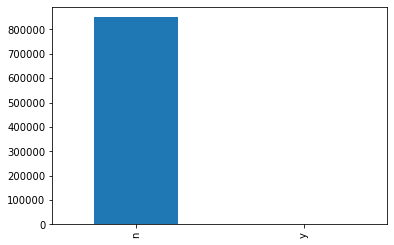

In [17]:
train_df['pymnt_plan'].value_counts().plot.bar()

#### Count of y variable is insignificant hence dropping the same 

In [18]:

del train_df['pymnt_plan']

### Missing values treatment

### Imputing the missing values for all the variables...

In [20]:
for x in train_df.columns[:]:
    if train_df[x].dtype=='object':
        train_df[x].fillna(train_df[x].mode()[0],inplace=True)
    elif train_df[x].dtype=='int64' or train_df[x].dtype=='float64':
        train_df[x].fillna(train_df[x].mean(),inplace=True)

#### Checking missing values

In [21]:
print(train_df.isnull().sum()) 

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prnc

#### Dropped as the same is in the dateformat

In [22]:
print(train_df['last_pymnt_d'].value_counts())

16-Jan    476359
15-Dec    142783
15-Jul     14472
15-Aug     13010
15-Oct     12502
15-Jun     11977
15-Sep     11448
15-Apr     11102
15-May     11065
15-Mar     10755
15-Nov     10692
15-Feb      8848
15-Jan      8652
14-Oct      7671
14-Dec      7249
14-Sep      6315
14-Jul      6312
14-Aug      6301
14-Nov      6201
14-Jun      5618
14-May      4717
14-Mar      4568
14-Apr      4318
14-Jan      3642
14-Feb      3627
13-Dec      3031
13-Oct      2812
13-Nov      2629
13-Aug      2498
13-Sep      2482
13-Jul      2367
13-May      2134
13-Mar      2022
13-Jun      1972
13-Apr      1871
13-Feb      1571
13-Jan      1350
12-Oct       986
12-Dec       977
12-Nov       925
12-Sep       884
12-Aug       865
12-Jul       736
12-Mar       663
12-May       646
12-Apr       617
12-Jun       608
12-Feb       568
12-Jan       384
11-Dec       369
11-Oct       353
11-Sep       325
11-Nov       305
11-Aug       296
11-Jul       263
11-Jun       254
11-May       246
11-Mar       227
11-Apr       1

#### Dropped as per above

In [23]:
train_df=train_df.drop(['last_pymnt_d'],axis=1)

In [24]:
print(train_df.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal   

### Converting all variables to numerical

#Conversion of float point variables in to numerical form, first we'll pull out all floating point variable and see..

In [25]:
colname=[]
for x in train_df.columns:
    if train_df[x].dtype=='float64':
        colname.append(x)
        

#Printing the floating point variable

In [26]:
print(colname)

['funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_util', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']


In [27]:
#Here we go with transform the variable into numerical form...
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
    train_df[x]=le.fit_transform(train_df[x])

In [28]:
print(train_df.dtypes)    

id                             int64
member_id                      int64
loan_amnt                      int64
funded_amnt                    int64
funded_amnt_inv                int64
term                          object
int_rate                       int64
installment                    int64
grade                         object
sub_grade                     object
emp_title                     object
emp_length                    object
home_ownership                object
annual_inc                     int64
verification_status           object
issue_d                       object
purpose                       object
title                         object
zip_code                      object
addr_state                    object
dti                            int64
delinq_2yrs                    int64
earliest_cr_line              object
inq_last_6mths                 int64
open_acc                       int64
pub_rec                        int64
revol_bal                      int64
r

#### This variable is used for splitting the data and is not significant for model building

In [29]:
print(train_df['issue_d'].value_counts())

15-Oct    48212
15-Jul    44906
14-Oct    37442
15-Nov    37211
15-Dec    35638
15-Aug    35267
15-Apr    34332
15-Jan    33887
15-May    30923
14-Jul    28315
15-Sep    28170
15-Jun    27587
15-Mar    24573
14-Nov    24143
15-Feb    22991
14-May    18493
14-Apr    18458
14-Aug    18203
14-Jun    16556
14-Mar    16012
14-Jan    15178
14-Feb    14903
13-Dec    14609
13-Nov    14299
13-Oct    13756
13-Sep    12694
13-Aug    12414
13-Jul    11632
13-Jun    10663
14-Sep    10233
13-May    10121
14-Dec     9929
13-Apr     9212
13-Mar     8118
13-Feb     7424
13-Jan     6736
12-Nov     6319
12-Oct     6228
12-Sep     6064
12-Dec     5980
12-Aug     5398
12-Jul     4604
12-Jun     3790
12-May     3386
12-Apr     3221
12-Mar     2903
12-Jan     2595
12-Feb     2547
11-Dec     2256
11-Nov     2225
11-Oct     2108
11-Sep     2062
11-Aug     1925
11-Jul     1865
11-Jun     1826
11-May     1701
11-Apr     1562
11-Mar     1442
11-Jan     1368
11-Feb     1296
10-Dec     1266
10-Oct     1131
10-Nov  

#### Dropping as per above explanation

In [30]:
del train_df['issue_d']

#### checking the unique record for this particular column

In [31]:
print(train_df['zip_code'].value_counts())

945xx    9370
750xx    9058
112xx    8827
606xx    8285
300xx    7746
         ... 
901xx       1
348xx       1
819xx       1
742xx       1
507xx       1
Name: zip_code, Length: 931, dtype: int64


#### Zip code is removed as the same is varchar variable hence not significant for model building

In [32]:
del train_df['zip_code']

#We'll check out the unique record for this particular variable..

In [33]:
print(train_df['initial_list_status'].value_counts())

f    436026
w    413414
Name: initial_list_status, dtype: int64


#### Plotting the graph for the graphical representation...

<AxesSubplot:xlabel='initial_list_status', ylabel='count'>

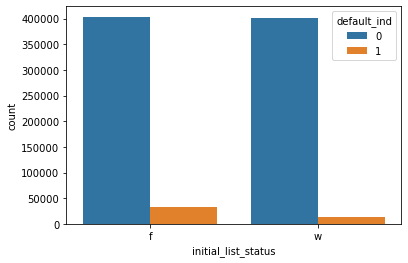

In [34]:
sns.countplot('initial_list_status',data=train_df,hue='default_ind')

#### doing the lable encoding manually for this particular column

In [35]:
train_df['initial_list_status'] = np.where(train_df['initial_list_status']=='f', 0, train_df['initial_list_status'])
train_df['initial_list_status'] = np.where(train_df['initial_list_status']=='w', 1, train_df['initial_list_status'])

#### Checking out it's converted or not

In [36]:
print(train_df['initial_list_status'].value_counts())

0    436026
1    413414
Name: initial_list_status, dtype: int64


#### We'll first check unique record for this particular column

In [37]:
train_df['int_rate'].value_counts()

75     34056
48     24956
182    24359
59     21315
34     20062
       ...  
386        1
336        1
225        1
222        1
296        1
Name: int_rate, Length: 392, dtype: int64

#### Ploting the graph for checking out the normal distribution of the variable, and this variable got perfect skewness means it's not right skewed or left skewed so keeping it....

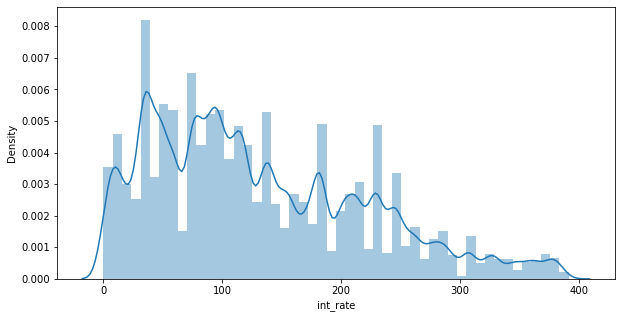

In [38]:
plt.figure(figsize=(10,5))
sns.distplot(train_df['int_rate'])
plt.show()

#### this variable is our target varaible ploting and checking out the record and got the result as imbalanced data, that's gonna be make mistake when we'll try to fit the model and mistake will be read the same values again and again in ration of 9:1, and falsly predict the default values as well...

<AxesSubplot:>

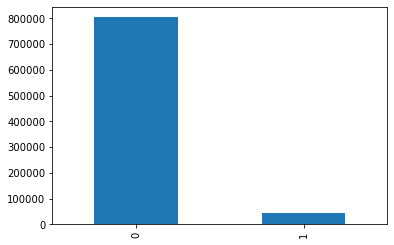

In [39]:
 train_df['default_ind'].value_counts().plot.bar()

#### will check the unique record for this particular column.

In [40]:
print(train_df['title'].value_counts())

Debt consolidation                         398071
Credit card refinancing                    159227
Home improvement                            38626
Other                                       30521
Debt Consolidation                          15242
                                            ...  
Loan to help me through the tough times         1
Get Rid of High Rates                           1
Music Loan                                      1
relief from high interst                        1
Credit Card/Auto Repair                         1
Name: title, Length: 57246, dtype: int64


In [41]:
 del train_df['title']

#### Appending all variables with dtype object

In [42]:
colname=[]
for x in train_df.columns:
    if train_df[x].dtype=='object':
        colname.append(x)

In [43]:
print(colname)

['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_credit_pull_d', 'application_type']


#### Using lable encoding function we'll fit the 'object' data type variables and transform the data in to numerical form...

In [44]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
    train_df[x]=le.fit_transform(train_df[x])  

In [45]:
print(train_df.dtypes)

id                            int64
member_id                     int64
loan_amnt                     int64
funded_amnt                   int64
funded_amnt_inv               int64
term                          int32
int_rate                      int64
installment                   int64
grade                         int32
sub_grade                     int32
emp_title                     int32
emp_length                    int32
home_ownership                int32
annual_inc                    int64
verification_status           int32
purpose                       int32
addr_state                    int32
dti                           int64
delinq_2yrs                   int64
earliest_cr_line              int32
inq_last_6mths                int64
open_acc                      int64
pub_rec                       int64
revol_bal                     int64
revol_util                    int64
total_acc                     int64
initial_list_status           int32
out_prncp                   

In [46]:
print(train_df['emp_length'].value_counts())

1     324069
2      75115
3      66777
10     66393
0      53974
5      53421
4      50126
7      42964
8      42182
6      41162
9      33257
Name: emp_length, dtype: int64


#### Dropping the variables on domain knowledge

In [47]:
train_df=train_df.drop(['member_id', 'emp_title', 'addr_state', 'earliest_cr_line', 'out_prncp_inv', 'total_rec_late_fee',
                       'last_credit_pull_d', 'policy_code'],axis=1)

In [48]:
train_df=train_df.drop(['application_type'],axis=1)

#### Plotting histogram of all variables and check out the frequency distribution for remaining variables in the dataset

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'funded_amnt'}>,
        <AxesSubplot:title={'center':'funded_amnt_inv'}>,
        <AxesSubplot:title={'center':'term'}>,
        <AxesSubplot:title={'center':'int_rate'}>],
       [<AxesSubplot:title={'center':'installment'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sub_grade'}>,
        <AxesSubplot:title={'center':'emp_length'}>,
        <AxesSubplot:title={'center':'home_ownership'}>,
        <AxesSubplot:title={'center':'annual_inc'}>],
       [<AxesSubplot:title={'center':'verification_status'}>,
        <AxesSubplot:title={'center':'purpose'}>,
        <AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'delinq_2yrs'}>,
        <AxesSubplot:title={'center':'inq_last_6mths'}>,
        <AxesSubplot:title={'center':'open_acc'}>],
       [<AxesSubplot:title={'center':'pub_rec'}>,
   

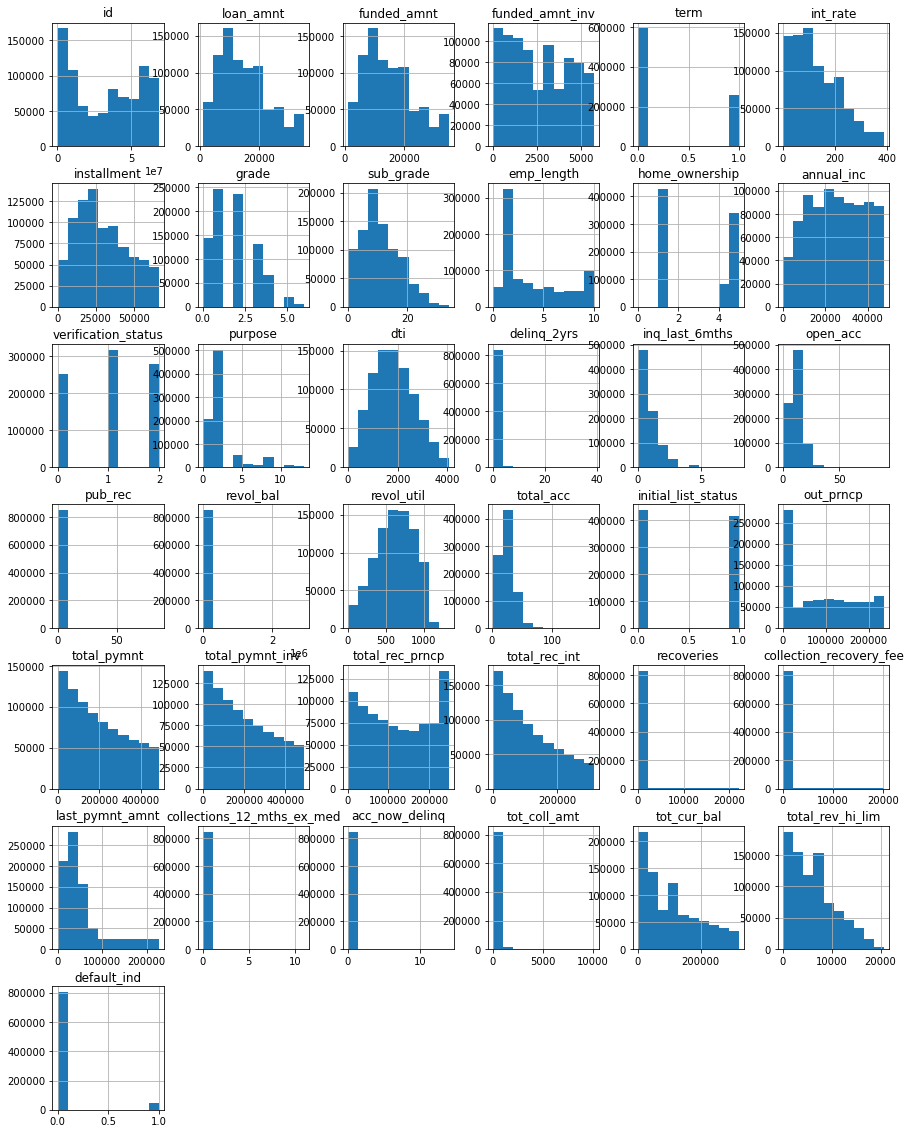

In [49]:
# Plotting histogram of all variables and check out the frequency distribution for remaining variables in the dataset
train_df.hist(figsize=(15,20))

#### checking the correlation for identify of enstablished relationship in between variables 

In [50]:
lis=train_df[train_df.columns].corr()['default_ind'][:]
print(train_df[train_df.columns].corr()['default_ind'][:])

id                           -0.219641
loan_amnt                    -0.003855
funded_amnt                  -0.004625
funded_amnt_inv              -0.006138
term                          0.033545
int_rate                      0.159480
installment                   0.005428
grade                         0.124153
sub_grade                     0.127409
emp_length                    0.012687
home_ownership                0.032111
annual_inc                   -0.059594
verification_status           0.041623
purpose                       0.041607
dti                           0.011825
delinq_2yrs                  -0.008786
inq_last_6mths                0.073455
open_acc                     -0.020835
pub_rec                      -0.019331
revol_bal                    -0.020814
revol_util                    0.045106
total_acc                    -0.020277
initial_list_status          -0.097390
out_prncp                    -0.260456
total_pymnt                  -0.016769
total_pymnt_inv          

In [51]:
corr=train_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
id,1.00,0.06,0.06,0.06,0.06,-0.15,0.02,-0.01,-0.01,-0.02,0.01,0.04,-0.04,-0.05,0.13,0.05,-0.12,0.09,0.08,0.04,-0.06,0.03,0.36,0.60,-0.72,-0.73,-0.75,-0.56,-0.15,-0.14,-0.30,0.05,0.02,0.04,-0.01,0.03,-0.22
loan_amnt,0.06,1.00,1.00,0.98,0.41,0.15,0.95,0.15,0.16,-0.03,-0.20,0.52,0.28,-0.16,0.04,-0.00,-0.03,0.20,-0.08,0.34,0.12,0.22,0.08,0.56,0.43,0.43,0.31,0.56,0.06,0.04,0.34,-0.02,0.00,-0.04,0.33,0.43,-0.00
funded_amnt,0.06,1.00,1.00,0.98,0.41,0.15,0.95,0.15,0.16,-0.03,-0.20,0.52,0.28,-0.16,0.04,-0.00,-0.03,0.20,-0.08,0.34,0.12,0.22,0.08,0.56,0.43,0.43,0.31,0.56,0.06,0.04,0.34,-0.02,0.00,-0.04,0.33,0.43,-0.00
funded_amnt_inv,0.06,0.98,0.98,1.00,0.43,0.14,0.95,0.14,0.14,-0.03,-0.20,0.52,0.26,-0.17,0.05,-0.00,-0.03,0.20,-0.09,0.32,0.12,0.22,0.09,0.57,0.44,0.44,0.32,0.57,0.06,0.04,0.35,-0.02,0.00,-0.04,0.32,0.43,-0.01
term,0.06,0.41,0.41,0.43,1.00,0.43,0.18,0.45,0.46,-0.02,-0.11,0.14,0.17,-0.05,0.10,-0.00,0.00,0.08,-0.03,0.09,0.08,0.10,0.13,0.38,0.07,0.07,-0.08,0.38,0.06,0.04,0.05,-0.01,0.00,-0.02,0.14,0.11,0.03
int_rate,-0.15,0.15,0.15,0.14,0.43,1.00,0.13,0.95,0.98,0.00,0.06,-0.10,0.25,0.15,0.16,0.05,0.23,-0.01,0.05,-0.03,0.26,-0.04,-0.12,0.01,0.16,0.16,0.02,0.45,0.13,0.12,0.11,0.01,0.03,0.00,-0.09,-0.21,0.16
installment,0.02,0.95,0.95,0.95,0.18,0.13,1.00,0.12,0.13,-0.02,-0.17,0.50,0.27,-0.15,0.04,0.00,-0.00,0.19,-0.08,0.32,0.14,0.20,0.03,0.49,0.49,0.49,0.38,0.55,0.06,0.05,0.38,-0.02,0.01,-0.04,0.29,0.40,0.01
grade,-0.01,0.15,0.15,0.14,0.45,0.95,0.12,1.00,0.98,-0.00,0.06,-0.10,0.23,0.15,0.17,0.06,0.21,-0.00,0.06,-0.03,0.25,-0.03,-0.07,0.09,0.06,0.06,-0.08,0.36,0.11,0.10,0.06,0.02,0.03,0.01,-0.09,-0.21,0.12
sub_grade,-0.01,0.16,0.16,0.14,0.46,0.98,0.13,0.98,1.00,-0.00,0.06,-0.11,0.24,0.16,0.18,0.06,0.22,-0.00,0.06,-0.03,0.26,-0.04,-0.07,0.09,0.06,0.06,-0.08,0.38,0.11,0.10,0.06,0.02,0.03,0.02,-0.09,-0.22,0.13
emp_length,-0.02,-0.03,-0.03,-0.03,-0.02,0.00,-0.02,-0.00,-0.00,1.00,0.07,-0.03,-0.04,0.00,-0.02,-0.03,0.00,-0.01,-0.02,-0.04,-0.00,-0.05,-0.01,-0.03,0.00,0.00,0.01,-0.01,0.01,0.01,-0.00,-0.00,-0.00,-0.01,-0.03,-0.04,0.01


#### Plotting the heatmap for checking out the correlation in betwwen the variables...

<AxesSubplot:>

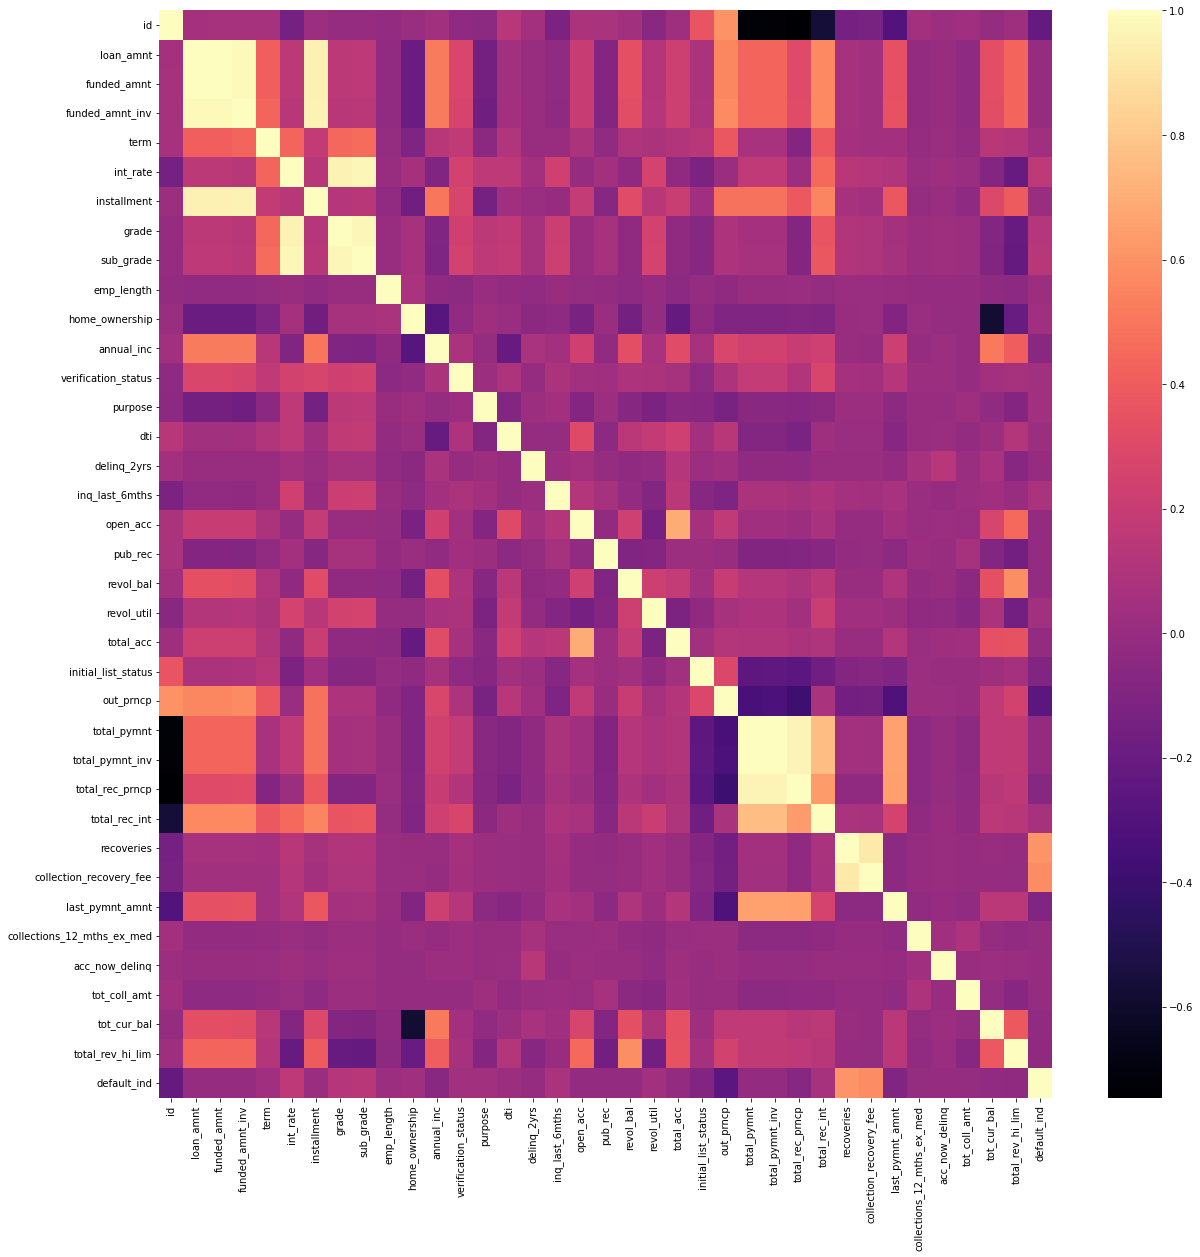

In [52]:
plt.figure(figsize=(20,20))
sns.heatmap(train_df.corr(),annot=False,cmap='magma')

#checking out the continuous variable ploting density plots thats used to observe the distribution of a variable in a dataset.
#It plots the graph on a continuous interval or time-period, An advantage of Density Plots over Histograms is that they're better at determining the distribution shape because they're not affected by the number of bins.

Text(0.5, 1.0, 'Total committed by Investors')

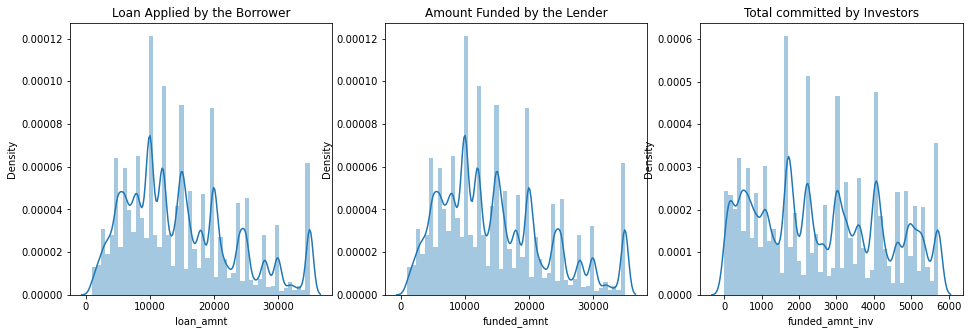

In [53]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))
sns.distplot(train_df['loan_amnt'],ax=ax[0])
sns.distplot(train_df['funded_amnt'], ax=ax[1])
sns.distplot(train_df['funded_amnt_inv'], ax=ax[2])

ax[1].set_title("Amount Funded by the Lender")
ax[0].set_title("Loan Applied by the Borrower")
ax[2].set_title("Total committed by Investors")

#### After ploting the heatmap found variable with very low correlation and had some variable with same distribution
#### we'll treat the model as unnecessary sampled performing again and again, found some highly skewed variable too.

In [54]:
train_df=train_df.drop(['funded_amnt_inv','funded_amnt','delinq_2yrs','collections_12_mths_ex_med','acc_now_delinq',
                        'tot_coll_amt'],axis=1)

### Splitting data into Independent & Dependent Dataframe

#### Spiting the dataset into X and Y

In [55]:
X=train_df.iloc[:,0:-1].values
Y=train_df.iloc[:,-1].values

In [56]:
print(X.shape)
print(Y.shape)

(849440, 30)
(849440,)


#### Ploting the count plot for the dependent variable and identifying the imbalanced data and perform oversampling technique.

([<matplotlib.axis.XTick at 0x19bbc2deeb0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

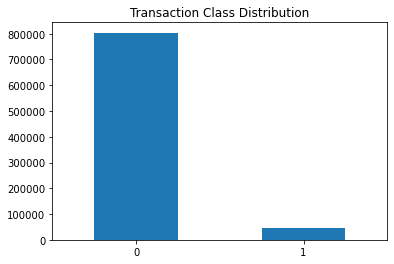

In [57]:
count_classes = pd.value_counts(train_df['default_ind'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2))

# Interpretation - It is observed that the y varibale is imbalanced 

### Resampling of the data

#### We'll first split the classified binary numbers in to 'approved', and 'reject' two seperated variable

In [58]:
approved = train_df[train_df['default_ind']==1]

reject = train_df[train_df['default_ind']==0]

#### Now will check the shape of stored 0's and 1's in diffrent-diffrent variable

In [59]:
print(approved.shape,reject.shape)

(45581, 31) (803859, 31)


### Dealing with Imbalance data using SMOT

#### Performing RandomOverSampler technique to handle imbalanced data, imblearn package that help to identfy the imbalanced data and performed oversampling technique for the model

In [61]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()
X_o_res, Y_o_res = os.fit_resample(X, Y)

In [62]:
print(X_o_res.shape,Y_o_res.shape)

(1607718, 30) (1607718,)


#### We are printing the original dataset values and after oversampling values

In [63]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(Y_o_res)))

Original dataset shape Counter({0: 803859, 1: 45581})
Resampled dataset shape Counter({0: 803859, 1: 803859})


### Scaling the data

#### performing standardScaler for removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers(if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_o_res)


StandardScaler()

#### Transforming..

In [65]:
X_o_res=scaler.transform(X_o_res)
print(X_o_res)


[[-1.01512275 -1.15396891 -0.70389302 ... -0.78908943  0.23818364
   0.34315349]
 [-1.01512609 -1.45112791  1.42067044 ... -0.88954536  0.23818364
   0.34315349]
 [-1.0151381  -1.46301427 -0.70389302 ...  0.18042166  0.23818364
   0.34315349]
 ...
 [ 0.86225583 -0.32192369  1.42067044 ... -0.56629606 -0.87707116
  -0.81686377]
 [-0.99995805  1.81762115  1.42067044 ...  0.48124481  0.23818364
   0.34315349]
 [-0.77533475 -1.07670757 -0.70389302 ... -0.71745359 -0.73287033
  -0.53983768]]


### Spliting X and Y into Train & Test

In [66]:

from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X_o_res,Y_o_res,test_size=0.3, random_state=10)


# Model Building 

# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
classfier=LogisticRegression(solver='liblinear', C=10.0, random_state=0,dual=False)
classfier.fit(X_train,Y_train)

Y_pred=classfier.predict(X_val)

print(list(zip(Y_val,Y_pred)))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [68]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_val,Y_pred)
print(cfm)
print("classification report: ")
print(classification_report(Y_val,Y_pred))

acc=accuracy_score(Y_val,Y_pred)
print("Accuracy of the model: ",acc)

[[237355   3889]
 [  9095 231977]]
classification report: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    241244
           1       0.98      0.96      0.97    241072

    accuracy                           0.97    482316
   macro avg       0.97      0.97      0.97    482316
weighted avg       0.97      0.97      0.97    482316

Accuracy of the model:  0.9730798895330033


#### adjusting the threshold, default point is 0.5 always for camparison with matrix values store the predicted probabilities.

In [69]:
Y_pred_prob=classfier.predict_proba(X_val)
print(Y_pred_prob)

[[9.92528943e-01 7.47105677e-03]
 [8.07809436e-08 9.99999919e-01]
 [6.57330191e-01 3.42669809e-01]
 ...
 [9.96047705e-01 3.95229546e-03]
 [9.98388584e-01 1.61141641e-03]
 [9.52539228e-01 4.74607721e-02]]


#### implemeting the accuracy for one.

In [73]:
Y_pred_class=[]
for value in Y_pred_prob[:,1]:
    if value>0.55:
        Y_pred_class.append(1)
    else:
        Y_pred_class.append(0)


In [74]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_val,Y_pred_class)
print(cfm)
print("classification report: ")
print(classification_report(Y_val,Y_pred_class))

acc=accuracy_score(Y_val,Y_pred_class)
print("Accuracy of the model: ",acc)

[[238038   3206]
 [  9632 231440]]
classification report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    241244
           1       0.99      0.96      0.97    241072

    accuracy                           0.97    482316
   macro avg       0.97      0.97      0.97    482316
weighted avg       0.97      0.97      0.97    482316

Accuracy of the model:  0.9733825956426907


#### auc mostly checks for getting model proficiancy is good or bad or very good

In [75]:
from sklearn import metrics

fpr,tpr,z=metrics.roc_curve(Y_val,Y_pred_class)
auc=metrics.auc(fpr,tpr)
print(auc)

0.9733778410295388


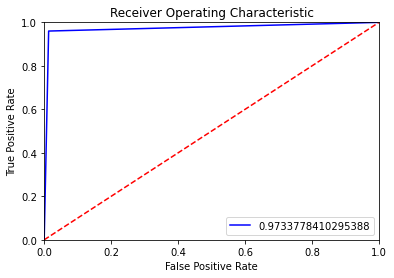

In [76]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()